In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('OLS_Orders.csv')

In [3]:
df.head()

,Order Number,Order Status,Order Date,Customer Note,Full Name (Billing),Company (Billing),City (Billing),State Name (Billing),Postcode (Billing),Full Name (Shipping),...,Name,Quantity,Item Cost,Category,Shipping Method,Payment Method Title,Order Subtotal Amount,Order Shipping Amount,Order Total Amount,Order Total Tax Amount
0,20461,On hold,1/8/2018 15:35,NaN,Peter Manic,NaN,Hosur,Tamil Nadu,635109,Peter Manic,...,Organic Banana (Elakki) 500gms,1.0,44.85,"Organic Fruits &amp; Vegetables,Organic Vegeta...",flat_rate,Deliver Tomorrow: Morning Slot (10:30 AM - 03:...,276.3,18.0,294.3,0
1,20461,On hold,1/8/2018 15:35,NaN,Peter Manic,NaN,Hosur,Tamil Nadu,635109,Peter Manic,...,Organic Tomato (Country) 500gms,2.0,27.60,"Organic Fruits &amp; Vegetables,Organic Vegeta...",flat_rate,Deliver Tomorrow: Morning Slot (10:30 AM - 03:...,276.3,18.0,294.3,0
2,20461,On hold,1/8/2018 15:35,NaN,Peter Manic,NaN,Hosur,Tamil Nadu,635109,Peter Manic,...,Organic Onion (Small) 500gms,1.0,42.90,"Organic Fruits &amp; Vegetables,Organic Vegeta...",flat_rate,Deliver Tomorrow: Morning Slot (10:30 AM - 03:...,276.3,18.0,294.3,0
3,20461,On hold,1/8/2018 15:35,NaN,Peter Manic,NaN,Hosur,Tamil Nadu,635109,Peter Manic,...,Organic Mint Leaves (Pudina),1.0,9.20,"Organic Fruits &amp; Vegetables,Organic Vegeta...",flat_rate,Deliver Tomorrow: Morning Slot (10:30 AM - 03:...,276.3,18.0,294.3,0
4,20461,On hold,1/8/2018 15:35,NaN,Peter Manic,NaN,Hosur,Tamil Nadu,635109,Peter Manic,...,Organic Coriander Leaves - 1 Piece,1.0,11.50,"Organic Fruits &amp; Vegetables,Organic Vegeta...",flat_rate,Deliver Tomorrow: Morning Slot (10:30 AM - 03:...,276.3,18.0,294.3,0


In [4]:
import matplotlib.pyplot as plt

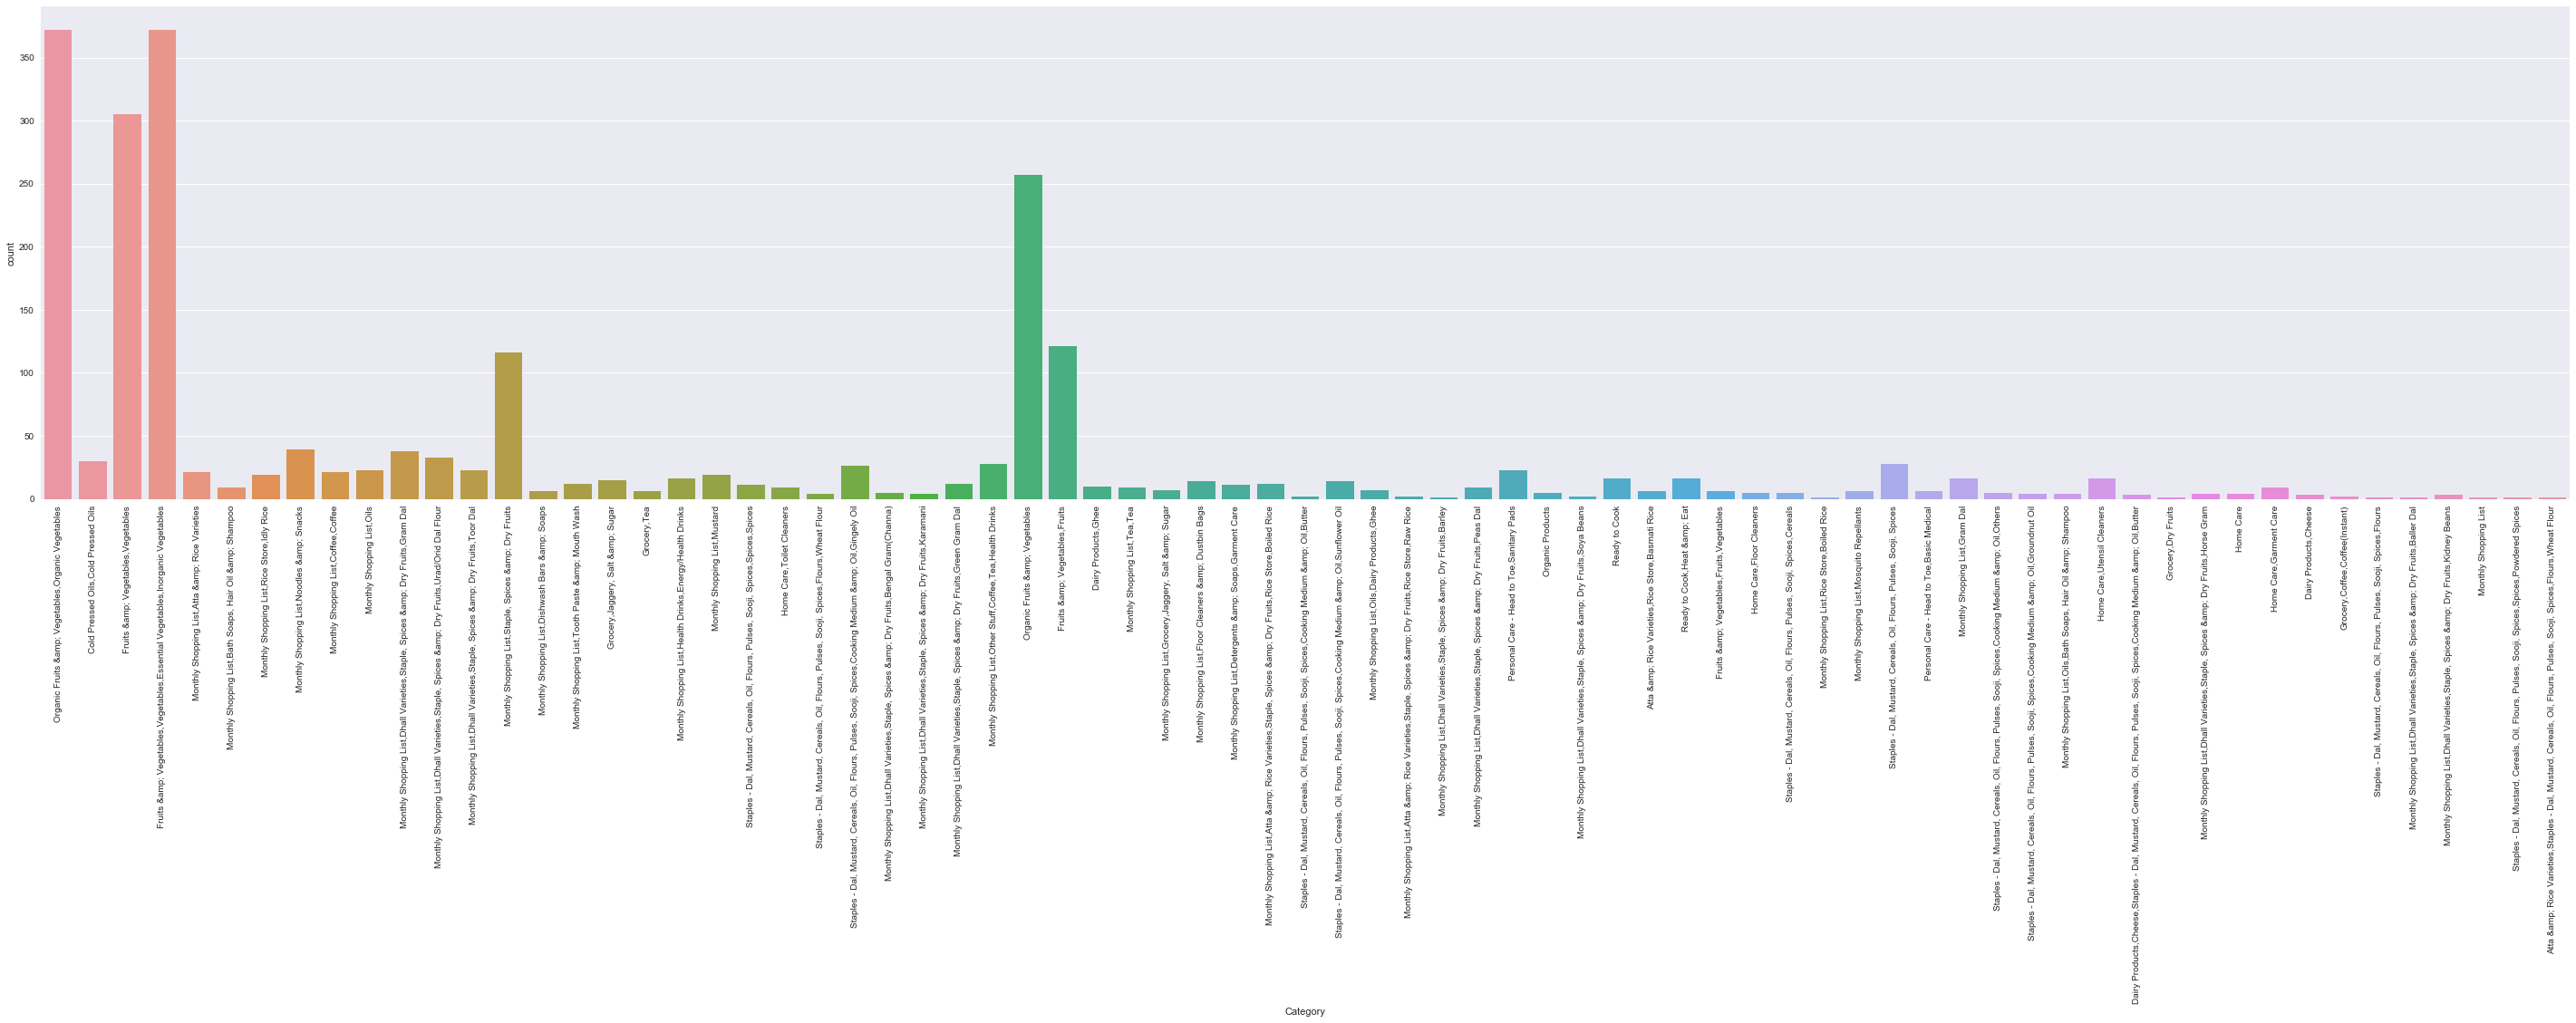

In [5]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
sns.countplot(x='Category', data=df)

In [6]:
import numpy as np

# Checking varying bill amount prices based on categories(using log(bill amount for normalization)

In [7]:
df['log_price'] = np.log(1 + df['Order Total Amount'])

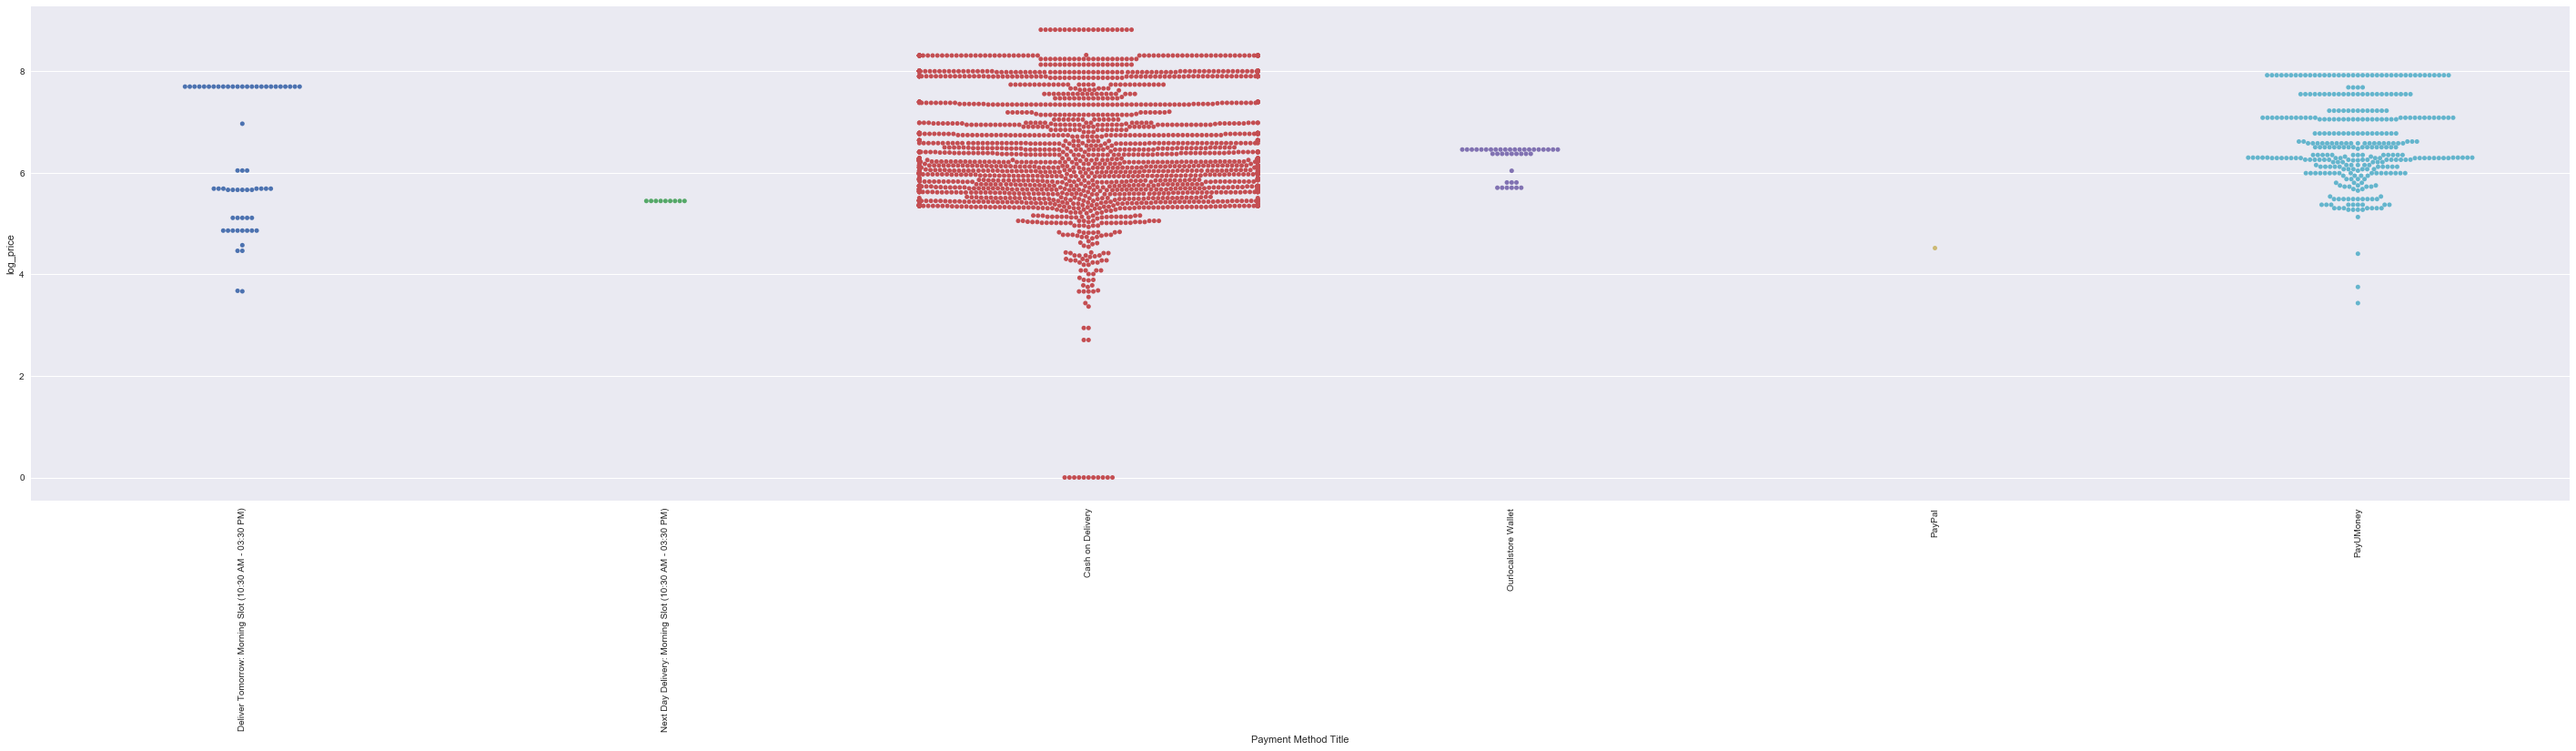

In [8]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
sns.swarmplot(x="Payment Method Title", y="log_price", data=df)

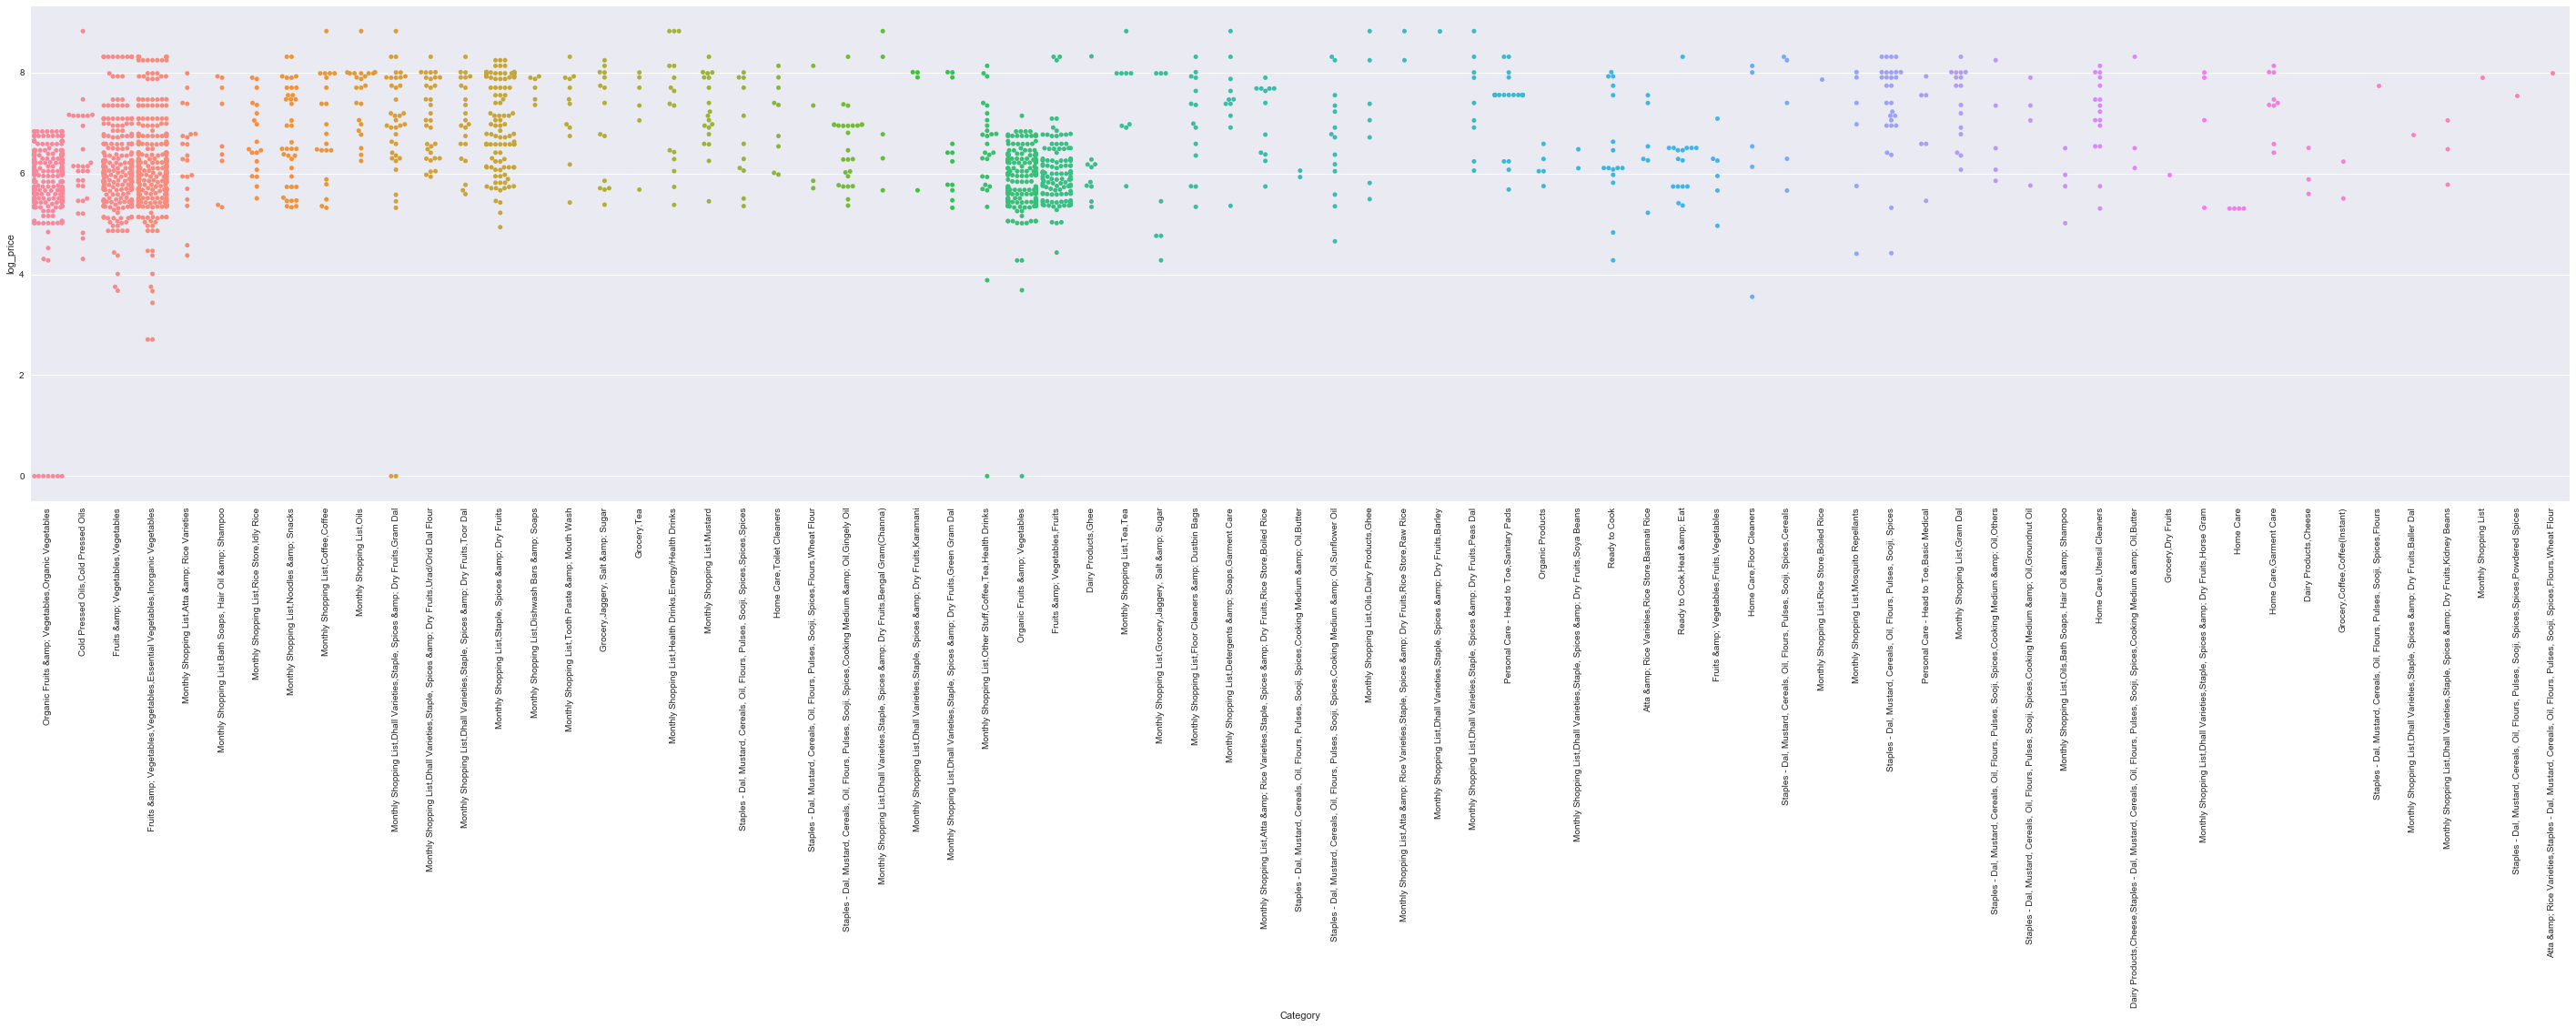

In [9]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
sns.swarmplot(x="Category", y="log_price", data=df)

# Creating new dataset to create a user-type model

In [10]:
#fields in the new df
order_number = []
order_category = []
no_of_items_in_cat = []
log_price = []
#loop to go through each row and do the processing
# going by each order
orders_lst = df['Order Number'].unique()
for every_order_no in orders_lst:
    temp_df = df[df['Order Number'] == every_order_no]
    uniq_categories = temp_df['Category'].unique()
    for every_categ in uniq_categories:
        order_number.append(every_order_no)
        order_category.append(every_categ)
        items_in_cat = len(temp_df[temp_df['Category'] == every_categ])
        lg_prce = temp_df['log_price'].unique().item()
        log_price.append(lg_prce)
        no_of_items_in_cat.append(items_in_cat)

In [11]:
new_df = pd.DataFrame({'no_of_items_in_cat':no_of_items_in_cat,'order_cat':order_category,'order_num':order_number,'log_price':log_price})

In [12]:
new_df.head()

,log_price,no_of_items_in_cat,order_cat,order_num
0,5.687992,7,"Organic Fruits &amp; Vegetables,Organic Vegeta...",20461
1,6.045005,3,"Cold Pressed Oils,Cold Pressed Oils",20442
2,5.112710,4,"Fruits &amp; Vegetables,Vegetables",20417
3,5.112710,1,"Fruits &amp; Vegetables,Vegetables,Essential V...",20417
4,3.676301,1,"Fruits &amp; Vegetables,Vegetables",20403


In [13]:
new_df.to_csv('data-for-model.csv', index=False)